In [1]:
!pip install jieba

In [2]:
!pip install collection

In [3]:
import sys
sys.path.append('../')

import jieba
import jieba.analyse
from optparse import OptionParser

content = open("hw1-dataset.txt", 'rb').read()
tags = jieba.analyse.extract_tags(content, topK=100,withWeight=True)

print(tags)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.718 seconds.
Prefix dict has been built successfully.


[('什麼', 0.19464509600157406), ('八卦', 0.19420501140555646), ('台灣', 0.12081408131496592), ('怎麼', 0.11186701189176337), ('肥宅', 0.07336596927026089), ('現在', 0.03800903805058438), ('不會', 0.036229733848907944), ('還是', 0.03568381096884812), ('是不是', 0.0355764318510935), ('一個', 0.03550183667549485), ('中國', 0.034474018907481), ('這樣', 0.0325902479818425), ('怎樣', 0.029860633581543415), ('時候', 0.02967528939386879), ('一樣', 0.028691280252032575), ('真的', 0.026822655692091746), ('沒有', 0.026099831518909124), ('...', 0.02543259244328046), ('應該', 0.02359936993246231), ('可以', 0.022958278161416924), ('喜歡', 0.02285462328744244), ('因為', 0.022416537025666042), ('一堆', 0.021680457381807062), ('問題', 0.020815837223021518), ('感覺', 0.020714740393380813), ('哪個', 0.020643972612632316), ('女生', 0.02055531365074145), ('這麼', 0.019963253959718225), ('覺得', 0.01862540591413954), ('這種', 0.01824460785582621), ('美國', 0.018055893773830226), ('正妹', 0.016286699255117856), ('知道', 0.015811205555870015), ('其實', 0.01557902144763291), 

In [4]:
# 統計詞頻
from collections import Counter
cut_words=""
for line in open("hw1-dataset.txt"):
    line.strip('\n')
    seg_list=jieba.cut(line,cut_all=False)
    cut_words+=(" ".join(seg_list))
all_words=cut_words.split()
c=Counter()
e=0
for x in all_words:
    e+=1
    if len(x)>1 and x != '\r\n':
        c[x] += 1

for (k,v) in c.most_common(100):
    print("%s:%d"%(k,v))
print(e)

八卦:79119
什麼:57760
台灣:35851
怎麼:33196
可以:23236
肥宅:21771
是不是:21560
真的:16890
知道:14114
自己:13560
不是:11943
現在:11279
就是:11021
不會:10751
如果:10690
還是:10589
一個:10535
中國:10230
一堆:10098
這樣:9671
有人:9666
怎樣:8861
時候:8806
女生:8630
日本:8594
一樣:8514
到底:8471
不要:8245
大家:7886
沒有:7745
...:7547
很多:7488
應該:7003
喜歡:6782
因為:6652
看到:6323
朋友:6303
問題:6177
感覺:6147
哪個:6126
如何:6007
這麼:5924
多少:5830
一直:5686
覺得:5527
這種:5414
美國:5358
不能:5267
不用:5230
根本:4952
一定:4863
正妹:4833
其實:4623
只有:4487
為何:4464
還有:4373
東西:4368
比較:4308
台北:4288
那麼:4264
可能:4249
以前:4139
QQ:3990
時間:3965
一下:3937
開始:3919
這個:3850
妹妹:3812
哪裡:3806
世界:3792
今天:3775
沒人:3725
甚麼:3700
出來:3656
所以:3633
那個:3577
直接:3563
發現:3559
中國人:3554
國家:3554
不到:3494
工作:3483
只是:3395
男生:3323
好吃:3320
他們:3220
公司:3199
老婆:3157
女友:3146
已經:2959
老師:2943
大學:2937
變成:2877
人家:2840
一起:2829
邊緣:2807
我們:2786
結果:2786
南部:2744
需要:2726
7168413


In [5]:
import math
import numpy as np
from matplotlib import pyplot as plt

def c_tf(list,n):
  tf=list/float(n)
  return tf
def c_idf(list,x):
  idf=math.log(float(x)/list)
  return idf

In [6]:
li=418202
for (k,v) in c.most_common(100):
      print(c_tf(v,e)*c_idf(v,li))

0.01837701685772427
0.015951316979142677
0.012286027540667807
0.01173247606174083
0.009368617917295796
0.008975724946386104
0.008918025676154054
0.007561521851956432
0.006672255894568147
0.0064861042869571095
0.005924205140507266
0.005684839156076873
0.005590378468003755
0.005490621602231091
0.00546795378224838
0.005430314924355571
0.005410136125752719
0.0052954324885814965
0.005245399129988215
0.005081883607706313
0.005079953549127086
0.004764373385239938
0.0047424497296144836
0.004671970512135668
0.004657492954293081
0.0046252451560254496
0.00460786869692479
0.004516037025524983
0.004368376160882413
0.004309763249517559
0.004226849729375847
0.004202003884625758
0.00399525675526724
0.003899512864167366
0.0038427256768785176
0.0036974106691555863
0.0036885011546279162
0.0036321664856563385
0.003618700893662016
0.0036092628324459414
0.003555589773481193
0.003517959642493187
0.0034751463576938335
0.00340914881219841
0.0033356849423486676
0.0032830879179994443
0.003256900629342203
0.00321

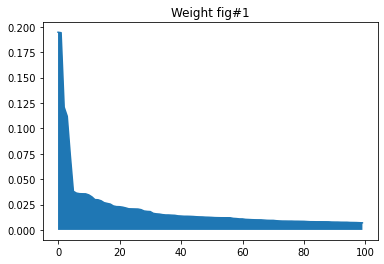

In [7]:
ys = [tags[i][1] for i in range(100)]
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys)

plt.title("Weight fig#1")
plt.show()

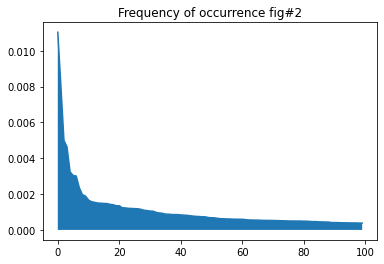

In [8]:
ys = [c_tf(c.most_common(100)[i][1],e) for i in range(100)]
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys)

plt.title("Frequency of occurrence fig#2")
plt.show()